<center> <h1> <b><span style="color:red"> 
BDA500 Assignment 3<br><br>
Jeff Sit<br><br>
<center> 12/11/2022</span></b></h1>

In [1]:
#1a. first import libraries and create dataframe from dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = 'data/a3_data.csv'
df = pd.read_csv(path)

# give names to columns
df.columns =['id','diagnosis', 'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 'concave points_mean' ,'symmetry_mean','fractal_dimension_mean', 'radius_se', 'texture_se' ,'perimeter_se', 'area_se' ,'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',  'symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst' ,'perimeter_worst' ,'area_worst' ,'smoothness_worst' ,'compactness_worst','concavity_worst','concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df.loc[len(df.index)] = [842302, 'M', 17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.3001, 0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 7.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [2]:
df.loc[df['id'] == 842302]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
568,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,7.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [3]:
#1b. check for missing data and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#1c. separate features from target
df_features = df.drop(['id','diagnosis'], axis=1)
df_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
#1d. separate features from target part 2
df_target = df[['diagnosis']]
df_target.value_counts()

diagnosis
B            357
M            212
dtype: int64

C:\Users\VTX_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Plot of Diagnosis')

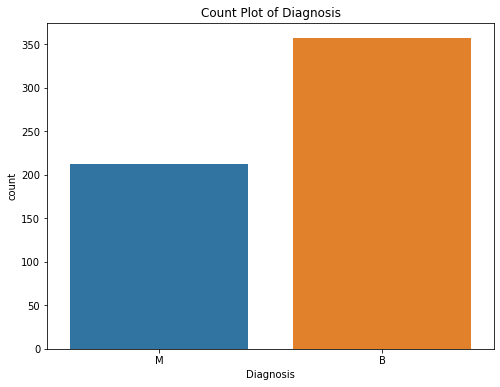

In [6]:
#1e. Visualize data for insights
plt.figure(figsize=(8, 6))
sns.countplot(df_target['diagnosis'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

In [7]:
#1f. finalize prep by creating new df where all features are the same magnitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_features)

sdf_features = scaler.transform(df_features)
sdf_features = pd.DataFrame(data=sdf_features, columns=df_features.columns)

df_scaled = pd.concat([sdf_features, df_target['diagnosis']], axis=1)

In [8]:
#2. start importing necessary libaries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [9]:
#2+3a. split data into training/test data using 70/30 split
from sklearn.model_selection import train_test_split
import time

x = df_features
y = df_target['diagnosis']

xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
#2+3b. create logistic regression classification model
t1 = time.time()
lr = LogisticRegression()
lr.fit(xtr, ytr)
t2 = time.time()
print(t2-t1)

0.016013383865356445


C:\Users\VTX_3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#2+3c. create k nearest neighbours classification model
t3 = time.time()
km = KNeighborsClassifier(n_neighbors=3)
km.fit(xtr, ytr)
t4 = time.time()
print(t4-t3)

0.002002239227294922


In [13]:
#2+3d. create support vector classifier using grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

t5 = time.time()
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(xtr, ytr)
t6 = time.time()
print(t6-t5)

1.1820762157440186


In [14]:
#4a. using accuracy as 1 of 2 methods to evaluate the models
from sklearn.metrics import classification_report
print("logistic regression model accuracy =", lr.score(xts, yts))
print("knn classifier accuracy =", km.score(xts, yts))
print("support vector classifier accuracy =", grid.score(xts, yts))

logistic regression model accuracy = 0.9473684210526315
knn classifier accuracy = 0.9239766081871345
support vector classifier accuracy = 0.9473684210526315


In [15]:
#4b. using classification report to find precision/recall as 2 of 2 methods to evaluate the models
print("Logistic regression Classification Report:\n", classification_report(yts, lr.predict(xts)))
print("knn Classification Report:\n", classification_report(yts, km.predict(xts)))
print("Support vector Classification Report:\n", classification_report(yts, grid.predict(xts)))

Logistic regression Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.98      0.96        98
           M       0.97      0.90      0.94        73

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

knn Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.94      0.93        98
           M       0.92      0.90      0.91        73

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

Support vector Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.95        98
           M       0.96      0.92      0.94        73

    accuracy                           0.95       171
   macro avg     

In [16]:
#5. use PCA to reduce dataset to have 95% variance ratio
from sklearn.decomposition import PCA
pca = PCA(.95)
print(pca)

PCA(n_components=0.95)


6. Since n_components is 0.95, it is a float between 0 and 1, meaning it keeps as many components as it needs in order to have a 95% variance ratio in the data.

In [17]:
#7+8a. using reduced dataset and splitting the data again
scaled_x = sdf_features
pca.fit(scaled_x)
pca_x = pca.transform(scaled_x)

x = pca_x
y = df_target['diagnosis']

xtr1,xts1,ytr1,yts1 = train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
#7+8b.
t1 = time.time()
lr.fit(xtr1, ytr1)
t2 = time.time()
print(t2-t1)

0.007006168365478516


In [19]:
#7+8c. 
t3 = time.time()
km.fit(xtr1, ytr1)
t4 = time.time()
print(t4-t3)

0.0010008811950683594


In [20]:
#7+8d. 
t5 = time.time()
grid.fit(xtr1, ytr1)
t6 = time.time()
print(t6-t5)

0.42939114570617676


In [21]:
#9. using pca to reduce dataset dimensions to 2 principal components
pca2 = PCA(2)
print(pca2)

PCA(n_components=2)


10. Now PCA n_components = 2 which is a positive integer. This means that the algorithm will return this number of principal components. In other words, there will only be 2 principal components. 

In [22]:
#11+12a. using a differently reduced dataset and splitting the data again
scaled_x = sdf_features
pca2.fit(scaled_x)
pca2_x = pca2.transform(scaled_x)

x = pca2_x
y = df_target['diagnosis']

xtr2,xts2,ytr2,yts2 = train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
#11+12b.
t1 = time.time()
lr.fit(xtr2, ytr2)
t2 = time.time()
print(t2-t1)

0.004003763198852539


In [24]:
#11+12c. 
t3 = time.time()
km.fit(xtr2, ytr2)
t4 = time.time()
print(t4-t3)

0.0010004043579101562


In [25]:
#11+12d. 
t5 = time.time()
grid.fit(xtr2, ytr2)
t6 = time.time()
print(t6-t5)

0.35532355308532715


C:\Users\VTX_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

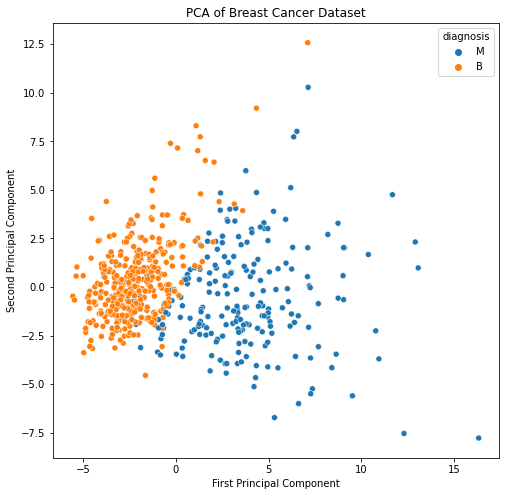

In [26]:
#13. visualizing data used from question 9
plt.figure(figsize=(8, 8))
sns.scatterplot(pca2_x[:, 0], pca2_x[:, 1], hue=df_target['diagnosis'])
plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

14. The logistic regression model has the best fit out of the models created in question 2. This is because it has a fast training time, and has the best accuracy, precision, and recall out of the 3 models created. For comparison, the knn model is extremely fast but slightly less accurate across every metric. Meanwhile the svc model is just as accurate as the logistic regression model but much slower to train. More details can be found in question 4 where these models and their metrics are more thoroughly evaluated.

In [51]:
#15. predicting from logistic regression model on original dataset
lr.fit(xtr, ytr)
lr_ypred = lr.predict(xts)
lr_ypred

C:\Users\VTX_3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B'], dtype=object)

In [52]:
#16. evaluate performance again
print("accuracy =", lr.score(xts, yts))
print("\nLogistic regression Classification Report:\n", classification_report(yts, lr.predict(xts)))

accuracy = 0.9473684210526315

Logistic regression Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.98      0.96        98
           M       0.97      0.90      0.94        73

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [57]:
#17a. predicting from logistic regression model on reduced .95 variance dataset
lr.fit(xtr1, ytr1)
lr_ypred = lr.predict(xts1)
lr_ypred

array(['M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B'], dtype=object)

In [58]:
print("accuracy =", lr.score(xts1, yts1))
print("\nknn Classification Report:\n", classification_report(yts1, lr.predict(xts1)))

accuracy = 0.9707602339181286

knn Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.98      0.97        98
           M       0.97      0.96      0.97        73

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [59]:
#17b. predicting from logistic regression model on reduced 2 components dataset
lr.fit(xtr2, ytr2)
lr_ypred = lr.predict(xts2)
lr_ypred

array(['B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B'], dtype=object)

In [60]:
print("accuracy =", lr.score(xts2, yts2))
print("\nSVC Classification Report:\n", classification_report(yts2, lr.predict(xts2)))

accuracy = 0.9473684210526315

SVC Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.95        98
           M       0.96      0.92      0.94        73

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

